In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pipeline import config
from pipeline.data_extractor import RowToColumnOriented

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Acquiring and Extracting Iris data

In [23]:
example = RowToColumnOriented(
    location = config.LOCATION,
    columns = config.COLUMNS,
    csv_filename = config.CSV_FILENAME,
    parquet_filename = config.PARQUET_FILENAME
) ## Instantiate instance of RowToColumnOriented() object

In [24]:
# Write to CSV, return a datafram
data = example.get_data_from_source(output_path = config.RAW_FILE_PATH) 

2021-08-15 20:12:47 INFO     Acquired file
2021-08-15 20:12:47 INFO     Wrote the file to csv


In [25]:
# convert the csv into parquet
example.convert_csv_to_parquet(
    target_file_path=config.PARQUET_PATH,
    source_file_path=config.RAW_FILE_PATH
)

2021-08-15 20:12:57 INFO     Acquired CSV
2021-08-15 20:12:57 INFO     Wrote to parquet


In [26]:
#convert the parquet back into a csv
example.convert_parquet_to_csv(
    source_file_path=config.PARQUET_PATH,
    target_file_path=config.RAW_FILE_PATH
)

2021-08-15 20:13:07 INFO     Read in parquet
2021-08-15 20:13:07 INFO     Wrote to csv


# Data Profiling

In [6]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### There appears to be null records in the "class" column
- The two null values do not appear to be of importance and can be dropped from the dataset

In [8]:
data["class"].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', nan]

In [9]:
data[~data["class"].isin(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])]

,sepal length,sepal width,petal length,petal width,class
150,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN


In [10]:
data.tail()

,sepal length,sepal width,petal length,petal width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN


### Dropping Nulls

- after dropping null values, we can see that the class variable is balance across all types of flower

In [29]:
subset_data = data.dropna()

In [30]:
subset_data.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [31]:
subset_data["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### Visualizing the numerical variables

- Looking at the histogram we see significant overlap between the sepal length and petal length
- This is confirmed by viewing the correlation plot

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

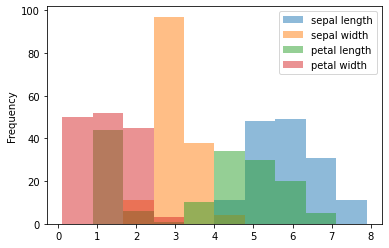

In [32]:
plt.figure();
subset_data.plot(kind='hist', alpha=0.5)

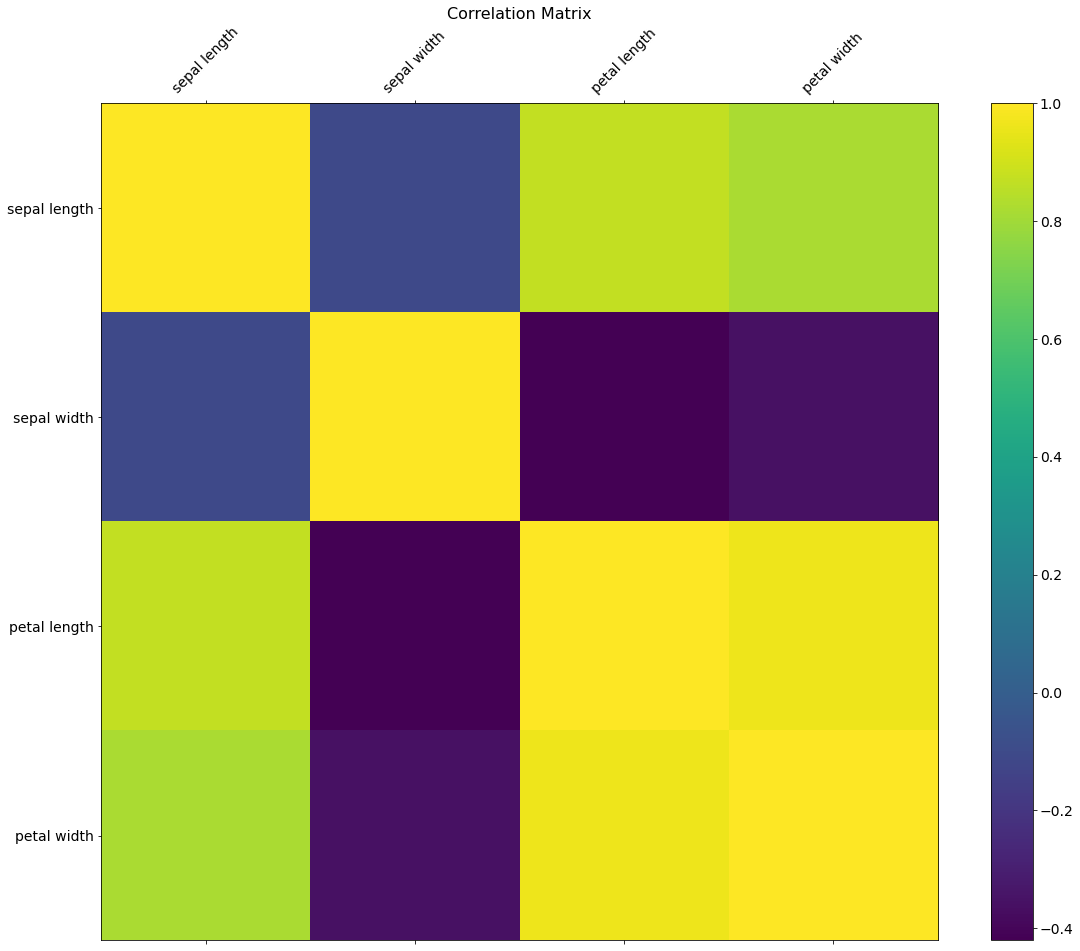

In [33]:
f = plt.figure(figsize=(19, 15))
plt.matshow(subset_data.corr(), fignum=f.number)
plt.xticks(range(subset_data.select_dtypes(['number']).shape[1]), subset_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(subset_data.select_dtypes(['number']).shape[1]), subset_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Subsetting dataset on class type

- This provides a view of the data after subsetting on each class type
- it appears that the numerical features of the dataset remain consistently distributed across all class types with the exception of **iris-setosa**
- The entire distribution for each numerical attribute seems to be skewed to the left by one unit

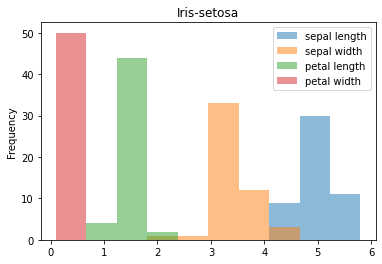

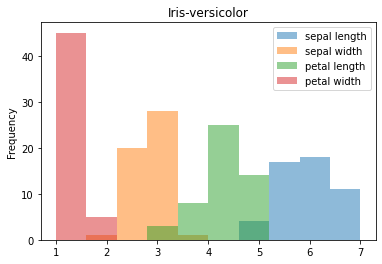

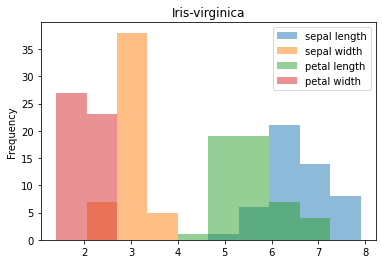

In [41]:
for c in subset_data["class"].unique().tolist():
    subset_data[subset_data["class"] == c].plot(kind='hist',label=c, alpha=0.5)
    plt.title(c)